In [152]:
from pyforest import *
lazy_imports()

['import imutils',
 'from fbprophet import Prophet',
 'from sklearn.preprocessing import RobustScaler',
 'import matplotlib as mpl',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.manifold import TSNE',
 'from sklearn.linear_model import Ridge',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import nltk',
 'from sklearn.linear_model import ElasticNetCV',
 'import datetime as dt',
 'from sklearn.linear_model import LinearRegression',
 'import statsmodels.api as sm',
 'from sklearn.decomposition import PCA',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import tensorflow as tf',
 'import tqdm',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import lightgbm as lgb',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import dash',
 'import bokeh',
 'from sklearn import svm',
 'import fastai',
 'import plotly as py',
 'from xlrd import open_workbook',
 'from scipy import stats',
 'import sklearn',
 'from s

In [153]:
df= pd.read_csv("compresive_strength_concrete+2.csv")
df.head()

<IPython.core.display.Javascript object>

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [154]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':
"slag",'Fly Ash (component 3)(kg in a m^3 mixture)':"ash",'Water (component 4)(kg in a m^3 mixture)': "water",'Superplasticizer (component 5)(kg in a m^3 mixture)':"superplastic",
'Coarse Aggregate (component 6)(kg in a m^3 mixture)':"Coarseagg",'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fineagg",'Age (day)':"age",'Concrete compressive strength(MPa, megapascals)':"strength"})
df

,cement,slag,ash,Water (component 4)(kg in a m^3 mixture),superplastic,Coarse Aggregate (component 6)(kg in a m^3 mixture),fineagg,age,"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [155]:
df.dtypes

cement                                                  float64
slag                                                    float64
ash                                                     float64
Water  (component 4)(kg in a m^3 mixture)               float64
superplastic                                            float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    float64
fineagg                                                 float64
age                                                       int64
Concrete compressive strength(MPa, megapascals)         float64
dtype: object

In [156]:
df.shape

(1030, 9)

In [157]:
df.isnull().sum()
#df.isna().sum()

cement                                                  0
slag                                                    0
ash                                                     0
Water  (component 4)(kg in a m^3 mixture)               0
superplastic                                            0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    0
fineagg                                                 0
age                                                     0
Concrete compressive strength(MPa, megapascals)         0
dtype: int64

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Exploratory Data Analysis

In [159]:
from scipy import stats

Q1 = df['cement'].quantile(q=0.25)
Q3 = df['cement'].quantile(q=0.75)
print('1st Quantile (Q1) is:' ,Q1)
print('3rd Quantile (Q3) is:' ,Q3)
print('Interquartile range (IQR) is', stats.iqr(df['cement']))

1st Quantile (Q1) is: 192.375
3rd Quantile (Q3) is: 350.0
Interquartile range (IQR) is 157.625


In [160]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers = Q1-1.5*(Q3-Q1)
U_outliers = Q3+1.5*(Q3-Q1)
print('lower outliers in cement',L_outliers)
print('Upper outliers in cement',U_outliers)

lower outliers in cement -44.0625
Upper outliers in cement 586.4375


In [161]:
#Checking for Presence of outliers with the upper and lower limits

print('Number of ouliers in cement upper',df[df['cement']>586.4375]['cement'].count())
print('Number of ouliers in cement lower',df[df['cement']<-44.0625]['cement'].count())

print('% of Outlier incement upper',round(df[df['cement']>586.4375]['cement'].count()*100/len(df)))
print('% of Outlier incement lower',round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)))

Number of ouliers in cement upper 0
Number of ouliers in cement lower 0
% of Outlier incement upper 0
% of Outlier incement lower 0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='cement'>

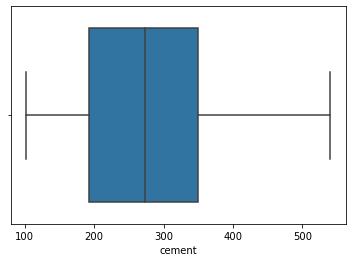

In [162]:
sns.boxplot(x='cement',data=df,orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\santh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ash')

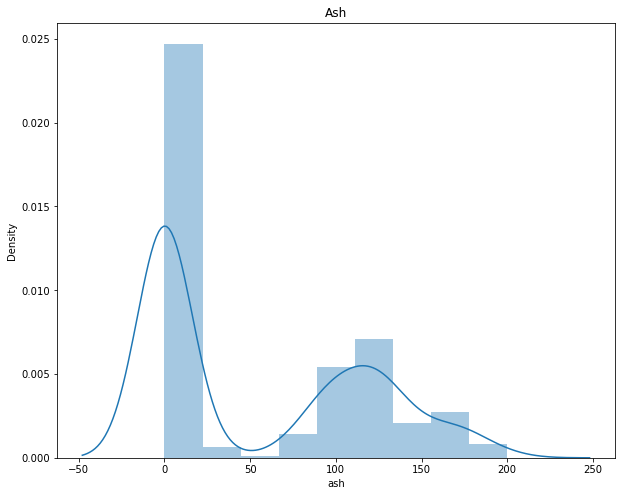

In [163]:
plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title("Ash")

# MultiVariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\santh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\santh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\santh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\santh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\santh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\santh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

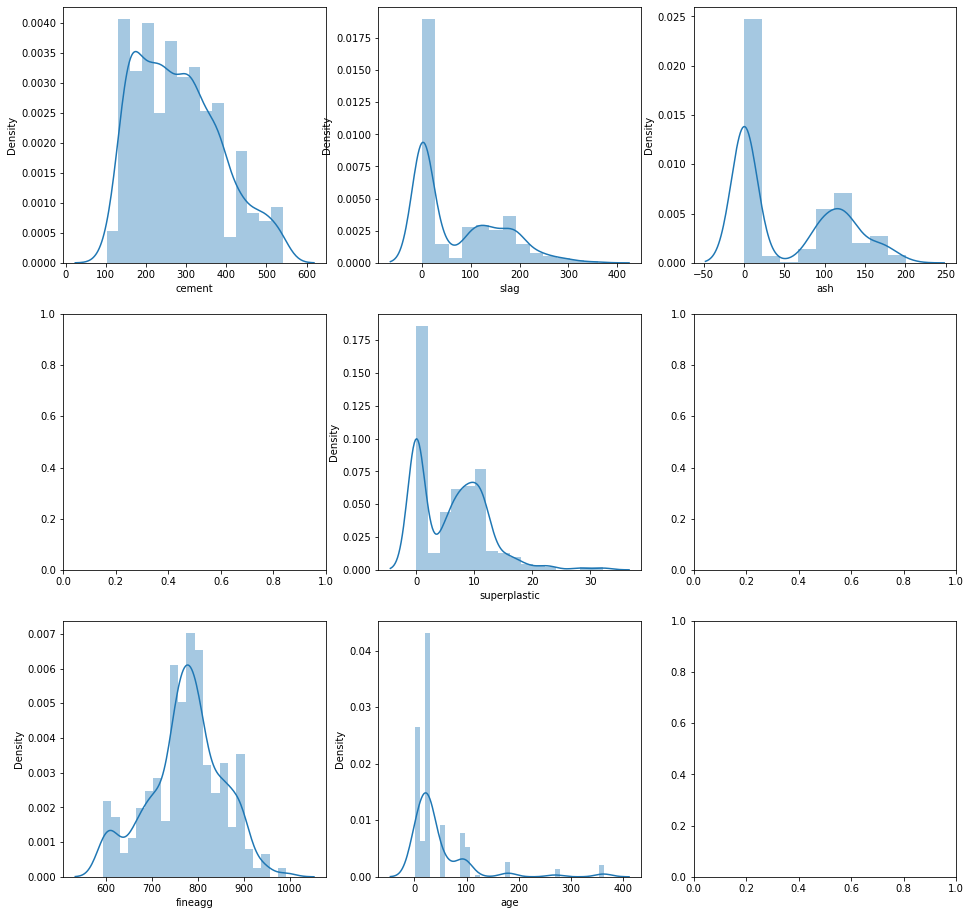

In [164]:
fig ,ax2 = plt.subplots(3,3,figsize = (16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
#sns.distplot(df['Water (component 4)(kg in a m^3 mixture)	'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
#sns.distplot(df['Coarse Aggregate (component 6)(kg in a m^3 mixture)'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
#sns.distplot(df['Concrete compressive strength(MPa, megapascals)'],ax=ax2[2][2])

<IPython.core.display.Javascript object>

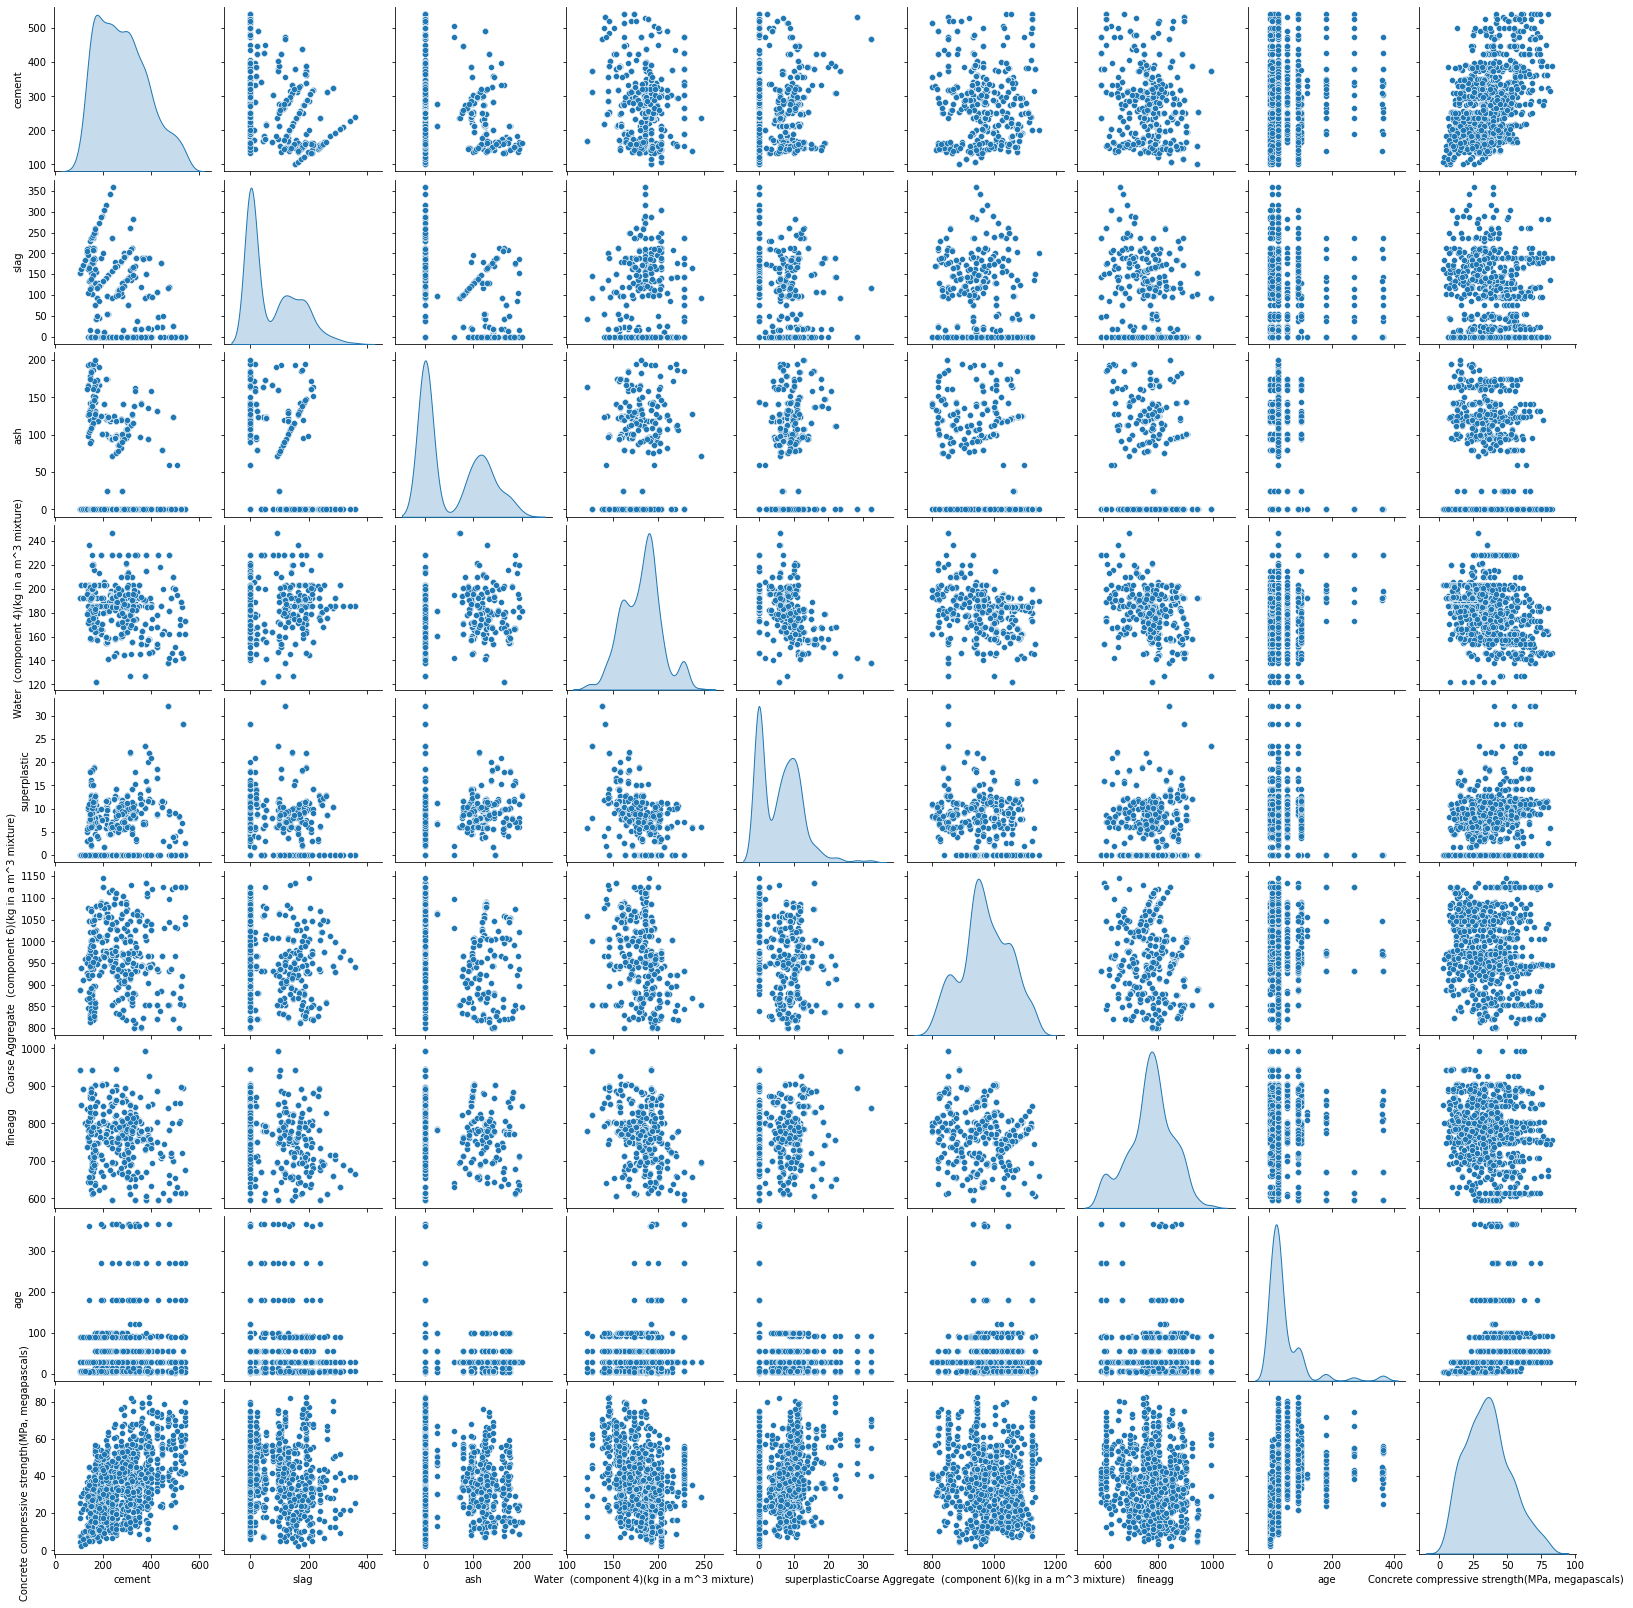

In [165]:
sns.pairplot(df, diag_kind='kde')

# Correlation between Variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

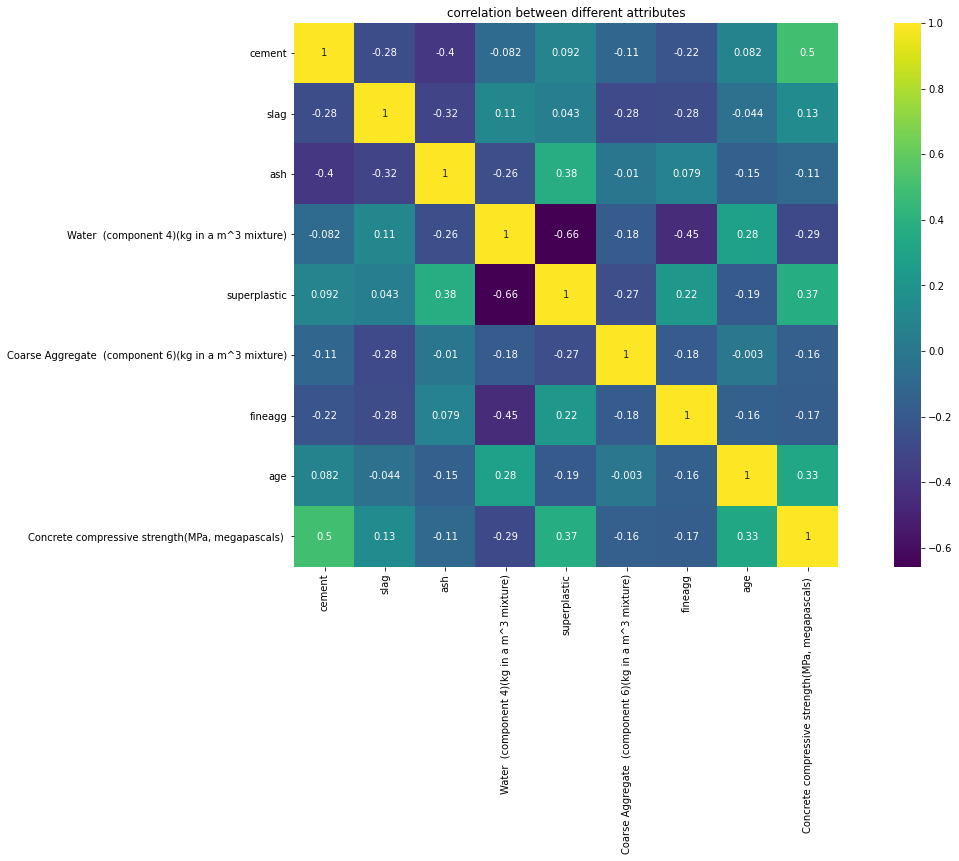

In [166]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('correlation between different attributes')
plt.show()

<AxesSubplot:>

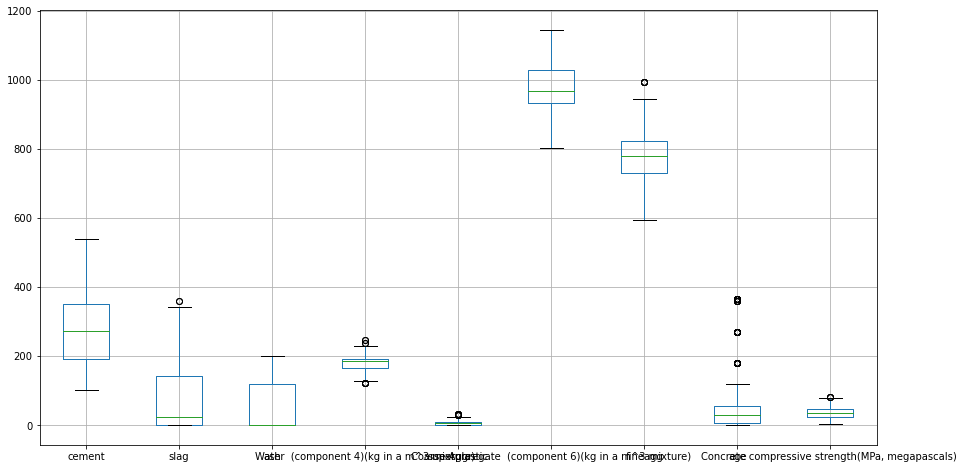

In [167]:
df.boxplot(figsize=(15,8))

# Checking for Outliners

In [168]:
print("Outliners for cement: ",df[((df.cement-df.cement.mean()) / df.cement.std()).abs()>3]['cement'].count())
print("Outliners for slag: ",df[((df.slag-df.slag.mean()) / df.slag.std()).abs()>3]['slag'].count())
print("Outliners for ash: ",df[((df.ash-df.ash.mean()) / df.ash.std()).abs()>3]['ash'].count())
# Outliner Formula = x-mean(x)/std > 3

Outliners for cement:  0
Outliners for slag:  4
Outliners for ash:  0


# Replacing  the outliners by median

In [169]:
for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    iqr = Q3-Q1
    
    low = Q1 -1.5*iqr
    high = Q3 +1.5 * iqr
    df.loc[(df[cols] < low) | (df[cols] > high),cols] =df[cols].median()
    

<AxesSubplot:>

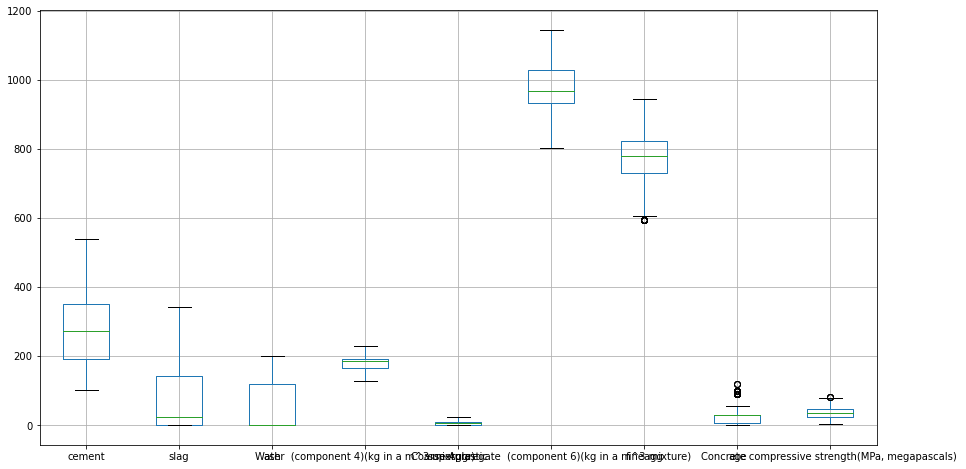

In [170]:
df.boxplot(figsize=(15,8))

# Feature Engineering and Model Building

In [171]:
df.head()

,cement,slag,ash,Water (component 4)(kg in a m^3 mixture),superplastic,Coarse Aggregate (component 6)(kg in a m^3 mixture),fineagg,age,"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [172]:
#Splitting the data into depenedent and independent variables
X = df.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']


In [173]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)

<IPython.core.display.Javascript object>

In [174]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y,test_size=0.3, random_state=1)


<IPython.core.display.Javascript object>

# Building Different Models

##  Random Forest

In [175]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [176]:
y_pred = model.predict(X_test)

In [177]:
#Model Performance on Training data
model.score(X_train,y_train)

0.9804352152296346

In [178]:
acc_R = metrics.r2_score(y_test,y_pred)
acc_R

<IPython.core.display.Javascript object>

0.872638830805875

In [179]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

33.38227932054592

In [180]:
#Store thea accuracy results for each model in a adataFrame for final comparision
results_1=pd.DataFrame({'Algorithm':['Random forest'], 'accuracy': acc_R},index={1})
results = results_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.872639


# KFold Cross validation

In [181]:
from sklearn.model_selection import KFold
k = 20

kfold = KFold(n_splits=k)
k_results = cross_val_score(model,X,y,cv = kfold)
accuracy = np.mean(abs(k_results))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7629117101495446

In [182]:
k_results

array([0.61664905, 0.8205585 , 0.39744825, 0.9591493 , 0.7620636 ,
       0.85167464, 0.67483006, 0.67871475, 0.40937459, 0.54013237,
       0.80215682, 0.66415535, 0.85753077, 0.86534278, 0.84970597,
       0.83444993, 0.9122806 , 0.95167382, 0.86395434, 0.94638872])

In [183]:
random_re=pd.DataFrame({'Algorithm':['Random forest Regressor K_fold'], 'accuracy': [accuracy]},index={2})
results = pd.concat([results,random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.872639
2,Random forest Regressor K_fold,0.762912


# Gradient Boosting Regressor

In [184]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [185]:
y_pred= model.predict(X_test)

In [186]:
model.score(X_train,y_train)

0.9477368610390589

In [187]:
acc_G = metrics.r2_score(y_test,y_pred)
acc_G

<IPython.core.display.Javascript object>

0.8802451229958667

In [188]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

31.388615379749556

In [189]:
gradient_re=pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'], 'accuracy': acc_G},index={3})
results = pd.concat([results,gradient_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.872639
2,Random forest Regressor K_fold,0.762912
3,Gradient Boosting Regressor,0.880245


# K-Fold Cross Validation

In [190]:
from sklearn.model_selection import KFold
k = 20

kfold = KFold(n_splits=k)
results_3 = cross_val_score(model,X,y,cv = kfold)
accuracy = np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7699280715050605

In [191]:
gradient_re_Kfold=pd.DataFrame({'Algorithm':['Gradient Boosting Regressor K fold'], 'accuracy': [accuracy]},index={4})
results = pd.concat([results,gradient_re_Kfold])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.872639
2,Random forest Regressor K_fold,0.762912
3,Gradient Boosting Regressor,0.880245
4,Gradient Boosting Regressor K fold,0.769928


# KNN Regressor

In [192]:
# Checking for different values of neighbours to determine
from sklearn.neighbors import KNeighborsRegressor
diff_k =[]
for i in range(1,45):
    knn =KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    diff_k.append(np.mean(pred_i!=y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

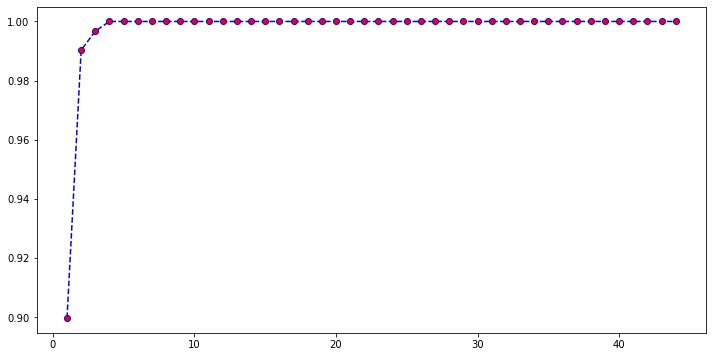

In [193]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker ='o',markerfacecolor='red')

In [194]:
model =KNeighborsRegressor(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [195]:
y_pred = model.predict(X_test)

In [196]:
model.score(X_train,y_train)

0.9075702785732312

In [197]:
acc_KNN = metrics.r2_score(y_test,y_pred)
acc_KNN

<IPython.core.display.Javascript object>

0.7539494934126327

In [198]:
KNN_re=pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': acc_KNN},index={5})
results = pd.concat([results,KNN_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.872639
2,Random forest Regressor K_fold,0.762912
3,Gradient Boosting Regressor,0.880245
4,Gradient Boosting Regressor K fold,0.769928
5,KNN Regressor,0.753949


# KFold Validation

In [199]:
from sklearn.model_selection import KFold
k = 20

kfold = KFold(n_splits=k)
results_4 = cross_val_score(model,X,y,cv = kfold)
accuracy = np.mean(abs(results_4))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6907106255855276

In [200]:
KNN_Kfold=pd.DataFrame({'Algorithm':['KNN Regressor KFold'], 'accuracy': [accuracy]},index={6})
results = pd.concat([results,KNN_Kfold])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.872639
2,Random forest Regressor K_fold,0.762912
3,Gradient Boosting Regressor,0.880245
4,Gradient Boosting Regressor K fold,0.769928
5,KNN Regressor,0.753949
6,KNN Regressor KFold,0.690711


In [201]:
#import xgboost as xgb
#from xgboost import XGBRegressor
#from xgboost.sklearn import XGBRegressor
#xgr = XGBRegressor()

#xgr.fit(X_train,y_train)

# DecisionTree Regressor

In [202]:
from sklearn.tree import DecisionTreeRegressor
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [203]:
#printing the feature Importance
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
                                                     Importance
cement                                                0.308521
slag                                                  0.058410
ash                                                   0.010383
Water  (component 4)(kg in a m^3 mixture)             0.124886
superplastic                                          0.047746
Coarse Aggregate  (component 6)(kg in a m^3 mix...    0.027440
fineagg                                               0.049653
age                                                   0.372962


In [204]:
y_pred=dec_model.predict(X_test)

In [205]:
dec_model.score(X_train,y_train)

0.9930841416603411

In [206]:
dec_model.score(X_test,y_test)

0.7384887154978386

In [207]:
acc_DC = metrics.r2_score(y_test,y_pred)
acc_DC

<IPython.core.display.Javascript object>

0.7384887154978386

In [208]:
DC =pd.DataFrame({'Algorithm':['Decision Tree'], 'accuracy': acc_DC},index={5})
results = pd.concat([results,DC])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.872639
2,Random forest Regressor K_fold,0.762912
3,Gradient Boosting Regressor,0.880245
4,Gradient Boosting Regressor K fold,0.769928
5,KNN Regressor,0.753949
6,KNN Regressor KFold,0.690711
5,Decision Tree,0.738489


In [209]:
df2 = df.copy()
df2

,cement,slag,ash,Water (component 4)(kg in a m^3 mixture),superplastic,Coarse Aggregate (component 6)(kg in a m^3 mixture),fineagg,age,"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [210]:
X = df2.drop( ['Concrete compressive strength(MPa, megapascals) ','ash','Coarse Aggregate  (component 6)(kg in a m^3 mixture)','fineagg'], axis=1)
y= df2['Concrete compressive strength(MPa, megapascals) ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [211]:
X_train=X_train.apply(zscore)
X_test=X_test.apply(zscore)

In [212]:
decNew_model = DecisionTreeRegressor()
decNew_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [213]:
#printing the feature Importance
print('Feature importance: \n',pd.DataFrame(decNew_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
                                            Importance
cement                                       0.352103
slag                                         0.074023
Water  (component 4)(kg in a m^3 mixture)    0.141849
superplastic                                 0.055218
age                                          0.376808


In [214]:
X=df.drop('Concrete compressive strength(MPa, megapascals) ',axis =1)
y=df['Concrete compressive strength(MPa, megapascals) ']

In [215]:
Xscaled=X.apply(zscore)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y,test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [217]:
dec_prun_model = DecisionTreeRegressor(max_depth=4,random_state=1,min_samples_leaf=5)
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [218]:
#printing the feature Importance
print('Feature importance: \n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
                                                     Importance
cement                                                0.355615
slag                                                  0.000000
ash                                                   0.000000
Water  (component 4)(kg in a m^3 mixture)             0.106034
superplastic                                          0.035409
Coarse Aggregate  (component 6)(kg in a m^3 mix...    0.000000
fineagg                                               0.025055
age                                                   0.477887


In [219]:
!pip install graphviz

In [220]:
!pip install pydot

In [221]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [222]:
Xscaled_df=Xscaled_df.drop('Concrete compressive strength(MPa, megapascals) ',axis =1)
feature_cols=Xscaled_df.columns
feature_cols

Index(['cement', 'slag', 'ash', 'Water  (component 4)(kg in a m^3 mixture)',
       'superplastic', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'fineagg', 'age'],
      dtype='object')

In [ ]:
dot_data = StringIO()
export_graphviz(dec_prun_model, out_file=dot_data,filled=True, rounded=True)
